In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import sys; sys.path.append("../../..")  # Allows access to all the scripts/modules in the larger directory
from utils import calc_loadings
from collections import defaultdict
from scipy.linalg import subspace_angles

In [4]:
"""" 
TO INITIALIZE A PRELOAD DICT FOR A NEW RUN ::
file_path = '/home/marcush/Data/TsaoLabData/split/degraded/preloaded/preloadDict.pickle'
"""

preloadDict = {}
with open(file_path, 'rb') as file:
    preloadDict = pickle.load(file)

### Load consolidated dimreduc dataframe

In [2]:
path = '/home/marcush/Data/TsaoLabData/neural_control_output/degraded_small_batch/degraded_small_batch_glom.pickle'
with open(path, 'rb') as f:
    dat = pickle.load(f) 

df_dimreduc = pd.DataFrame(dat)

In [37]:
df_dimreduc.columns

Index(['dim', 'fold_idx', 'train_idxs', 'test_idxs', 'dimreduc_method',
       'dimreduc_args', 'coef', 'score', 'data_file', 'loader', 'loader_args',
       'task_args', 'data_path', 'results_file'],
      dtype='object')

In [5]:
for pf in df_dimreduc['coef']:
    print(pf.shape)

(570, 44)
(570, 41)
(570, 43)
(570, 44)
(570, 43)
(570, 41)
(570, 42)
(570, 40)
(570, 40)
(570, 42)
(570, 42)
(570, 40)
(570, 40)
(570, 42)
(570, 44)
(570, 41)
(570, 43)
(570, 44)
(570, 43)
(570, 41)
(371, 44)
(371, 41)
(371, 43)
(371, 44)
(371, 43)
(371, 41)
(371, 42)
(371, 40)
(371, 40)
(371, 42)
(371, 41)
(371, 43)
(371, 44)
(371, 43)
(371, 41)
(371, 44)
(371, 42)
(371, 40)
(371, 40)
(371, 42)


In [38]:
df_dimreduc

,dim,fold_idx,train_idxs,test_idxs,dimreduc_method,dimreduc_args,coef,score,data_file,loader,loader_args,task_args,data_path,results_file
0,44,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[768, 769, 813, 833, 854, 870, 871, 874, 877, ...",PCA,{},"[[0.07471340522947727, -0.04161586685985088, 0...",0.457448,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
1,41,0,"[768, 769, 813, 833, 854, 870, 871, 874, 877, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",PCA,{},"[[0.10857428840261048, -0.05593924319264843, 0...",0.440007,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
2,43,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[768, 769, 813, 833, 854, 870, 871, 874, 877, ...",PCA,{},"[[0.07471340522947727, -0.04161586685985088, 0...",0.452672,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
3,44,0,"[768, 769, 813, 833, 854, 870, 871, 874, 877, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",PCA,{},"[[0.10857428840261048, -0.05593924319264843, 0...",0.455185,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
4,43,0,"[768, 769, 813, 833, 854, 870, 871, 874, 877, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",PCA,{},"[[0.10857428840261048, -0.05593924319264843, 0...",0.450173,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
5,41,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[768, 769, 813, 833, 854, 870, 871, 874, 877, ...",PCA,{},"[[0.07471340522947727, -0.04161586685985088, 0...",0.443024,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
6,42,0,"[768, 769, 813, 833, 854, 870, 871, 874, 877, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",PCA,{},"[[0.10857428840261048, -0.05593924319264843, 0...",0.445108,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
7,40,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[768, 769, 813, 833, 854, 870, 871, 874, 877, ...",PCA,{},"[[0.07471340522947727, -0.04161586685985088, 0...",0.43812,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/marcush/Data/TsaoLabData/neural_control_...
8,40,0,"[768, 769, 813, 833, 854, 870, 871, 874, 877, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",PCA,{},"[[0.10857428840261048, -0.05593924319264843, 0...",0.434815,degraded_only_v4_AnalysisDegraded_230322_21400...,tsao,"{'bin_width': 25, 'filter_fn': 'none', 'filter...","{'dim_vals': [40, 41, 42, 43, 44], 'n_folds': ...",/home/marcush/Data/TsaoLabData/split/degraded,/home/m

### Extract useful params and get average subspace angle difference

In [39]:
dimensions_dr = np.unique(df_dimreduc['dim'])
n_folds_dr = np.unique(df_dimreduc['fold_idx'])
bin_widths_dr = np.unique(df_dimreduc['loader_args'].apply(lambda x: x.get('bin_width')))
regions_dr = np.unique(df_dimreduc['loader_args'].apply(lambda x: x.get('region')))
dimreduc_methods_dr = np.unique(df_dimreduc['dimreduc_method'])

In [ ]:
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)
all_subspace_angles = recursive_defaultdict()

for reg in regions_dr:
    for bin_width in bin_widths_dr:        
        for dim in dimensions_dr:
            n_fold_sub_angles = np.zeros((len(n_folds_dr), dim))

            for n_folds in n_folds_dr:

                if (reg == 'AM' and bin_width == 25) or (reg == 'ML' and bin_width == 50):
                    continue
        

                df_dimreduc_filt = df_dimreduc[(df_dimreduc['loader_args'].apply(lambda x: x.get('region')) == reg)  & (df_dimreduc['loader_args'].apply(lambda x: x.get('bin_width')) == bin_width) & (df_dimreduc['dim'] == dim) & (df_dimreduc['fold_idx'] == n_folds)]

                FFC_coef = df_dimreduc_filt[df_dimreduc_filt['dimreduc_method'] == 'PCA']['coef'].iloc[0]
                FBC_coef = df_dimreduc_filt[df_dimreduc_filt['dimreduc_method'] == 'LQGCA']['coef'].iloc[0]

                n_fold_sub_angles[n_folds,:] = subspace_angles(FFC_coef, FBC_coef)
                
            all_subspace_angles[reg][bin_width][dim] = np.mean(n_fold_sub_angles, 0) # average the subspace angle differences across n_fold splits



In [40]:
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)
all_subspace_angles = recursive_defaultdict()

for reg in regions_dr:
    for bin_width in bin_widths_dr:        
        for dim in dimensions_dr:
            n_fold_sub_angles = np.zeros((len(n_folds_dr), dim))

            for n_folds in n_folds_dr:

                if (reg == 'AM' and bin_width == 25) or (reg == 'ML' and bin_width == 50):
                    continue
        

                df_dimreduc_filt = df_dimreduc[(df_dimreduc['loader_args'].apply(lambda x: x.get('region')) == reg)  & 
                                               (df_dimreduc['loader_args'].apply(lambda x: x.get('bin_width')) == bin_width) & (df_dimreduc['dim'] == dim) & (df_dimreduc['fold_idx'] == n_folds)]

                FFC_coef = df_dimreduc_filt[df_dimreduc_filt['dimreduc_method'] == 'PCA']['coef'].iloc[0]
                FBC_coef = df_dimreduc_filt[df_dimreduc_filt['dimreduc_method'] == 'LQGCA']['coef'].iloc[0]

                n_fold_sub_angles[n_folds,:] = subspace_angles(FFC_coef, FBC_coef)
                
            all_subspace_angles[reg][bin_width][dim] = np.mean(n_fold_sub_angles, 0) # average the subspace angle differences across n_fold splits



## Comparison of subspace angles

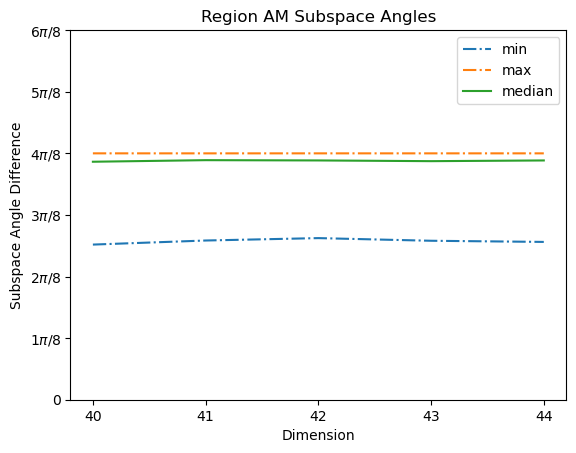

In [43]:
region = 'AM'
requested_ms = 50

AM_summary_stats = np.zeros((3, len(dimensions_dr)))
for idx, dim in enumerate(dimensions_dr):
    AM_summary_stats[0, idx] = np.min(all_subspace_angles[region][requested_ms][dim])
    AM_summary_stats[1, idx] = np.max(all_subspace_angles[region][requested_ms][dim])
    AM_summary_stats[2, idx] = np.median(all_subspace_angles[region][requested_ms][dim])


plt.plot(dimensions_dr, AM_summary_stats[0, :], '-.', label="min")
plt.plot(dimensions_dr, AM_summary_stats[1, :], '-.', label="max")
plt.plot(dimensions_dr, AM_summary_stats[2, :],  label="median")

plt.legend()
plt.title(f'Region {region} Subspace Angles')
plt.xticks(dimensions_dr)
plt.xlabel('Dimension')
plt.ylabel('Subspace Angle Difference')

# Manually set the y-axis ticks and labels
yticks = np.arange(0, 2 * np.pi + np.pi/8, np.pi/8)
ytick_labels = ['0'] + [r'${}\pi/8$'.format(i) for i in range(1, 16)] + [r'$2\pi$']
plt.yticks(yticks, ytick_labels)
plt.ylim([0, 3*np.pi/4])
plt.show()

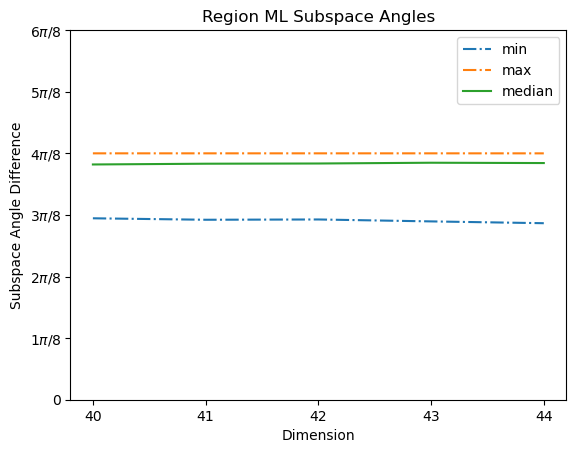

In [42]:
region = 'ML'
requested_ms = 25

AM_summary_stats = np.zeros((3, len(dimensions_dr)))
for idx, dim in enumerate(dimensions_dr):
    AM_summary_stats[0, idx] = np.min(all_subspace_angles[region][requested_ms][dim])
    AM_summary_stats[1, idx] = np.max(all_subspace_angles[region][requested_ms][dim])
    AM_summary_stats[2, idx] = np.median(all_subspace_angles[region][requested_ms][dim])


plt.plot(dimensions_dr, AM_summary_stats[0, :], '-.', label="min")
plt.plot(dimensions_dr, AM_summary_stats[1, :], '-.', label="max")
plt.plot(dimensions_dr, AM_summary_stats[2, :],  label="median")

plt.legend()
plt.title(f'Region {region} Subspace Angles')
plt.xticks(dimensions_dr)
plt.xlabel('Dimension')
plt.ylabel('Subspace Angle Difference')

# Manually set the y-axis ticks and labels
yticks = np.arange(0, 2 * np.pi + np.pi/8, np.pi/8)
ytick_labels = ['0'] + [r'${}\pi/8$'.format(i) for i in range(1, 16)] + [r'$2\pi$']
plt.yticks(yticks, ytick_labels)
plt.ylim([0, 3*np.pi/4])
plt.show()

## CCA

### Assume we have saved the data structures from loaders previously (see save_loaders_output if not)

In [ ]:
output_dir = df_dimreduc['data_path'][0] + '/loader_data'

all_spike_mats = {}
data_struct_paths = glob.glob(output_dir+"/*.pickle")
for data_struct_path in data_struct_paths:

    with open(data_struct_path, 'rb') as file:
        data_struct = pickle.load(file)

    region = data_struct['Regions']
    bin_width = data_struct['bin_width']
    
    all_spike_mats[f"{region}_{bin_width}ms_spikes"] = data_struct['spike_rates']


In [50]:
a = np.random.rand(2,3,4)

b = np.sum(a, 1)

np.shape(b)

(2, 4)

- Across regions, want to compare the CCA of each subspace. So:

# fix bin size to 50ms, get spike mats from both areas
spikes_mat_AM = all_spike_mats[...]
spikes_mat_ML = all_spike_mats[...]

spikes_mat_AM = np.sum(spikes_mat_AM, 1)
spikes_mat_ML = np.sum(spikes_mat_ML, 1)


for each split: 

    for each dim:
        spikes_mat_AM_train = spikes_mat_AM[train_inds]
        spikes_mat_ML_train = spikes_mat_ML[train_inds]

        AM_FFC_projected = spikes_mat_AM_train @ FFC_mat
        ML_FFC_projected = spikes_mat_AM_train @ FFC_mat

        AM_FBC_projected = spikes_mat_AM_train @ FBC_mat
        ML_FBC_projected = spikes_mat_AM_train @ FBC_mat


        CCA(AM_FFC_projected, ML_FFC_projected)
        CCA(AM_FBC_projected, ML_FFC_projected)


In [24]:
numUnits, num_ML_units,  num_AM_units

(941, 570, 371)